## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
sb.set()

In [2]:
data = pd.read_csv("Regression.csv")

In [3]:
data.head(4)

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,2
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,2


In [4]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.071429
std,104.530661,0.271617,0.861292
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


# Create the Regression

### Define the Dependent and Independent Variables

In [5]:
y = data['GPA']
x1 = data['SAT']

### Explore Data

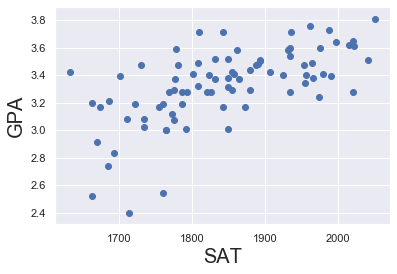

In [6]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

### Regression Itself

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\Mahdi Bayat\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           7.20e-11
Time:                        11:58:15   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### My Notes on the Above table

From the table we can understand the following points: ||
    1- b0 is equal to coef value of const which is 0.2750 |
    2- b1 is equal to coef values of SAT which is 0.0017 |
    3- R-Squared value is 0.406 |
    4- The type of Regression model is OLS using Least Square Method |

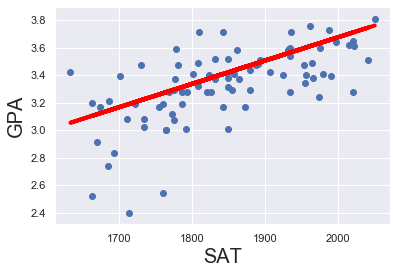

In [8]:
plt.scatter(x1,y)
yhat = 0.2750 + 0.0017*x1
fig = plt.plot(x1,yhat, lw=4,c='red', label='Regression Line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Multiple Linear Regression

In [9]:
y0 = data['SAT']
xi = data[['GPA', 'Rand 1,2,3']]

In [10]:
x0 = sm.add_constant(xi)
results = sm.OLS(y0,x0).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     27.68
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           6.88e-10
Time:                        11:58:15   Log-Likelihood:                -487.37
No. Observations:                  84   AIC:                             980.7
Df Residuals:                      81   BIC:                             988.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1030.5852    116.021      8.883      0.000     799.739    1261.431
GPA          244.9807     33.255      7.367      0.000     178.813     311.148
Rand 1,2,3    -0.5578     10.487     -0.053      0.958     -21.424      20.309
==============================================================================
Omnibus:                        0.557   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.450
Skew:                          -0.177   Prob(JB):                        0.798
Kurtosis:                       2.947   Cond. No.                         55.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Notes on the above table

The adjusted R-Squared is decreased in compare to previous model (simple linear regression model). (0.391 < 0.399)  which means we are penalized for adding  an additional variable that had no strong explanatory power.  We have added information but have lost value. Although the R-Squared value is still the same (or it can be increased) but adjusted R^2 is our criteria to compare regression models. We should exclude useless informations.| \\ 
The p-value for Rand 1,2,3 is 0.957 which means we cannot reject the null hypothesis at 95.7% level. This is an incredibly high p-value. Let me remind you, that for a coefficient to be statistically significant, we want a p-value < 0.05 !

Conclusion
    The variable 'Rand 1,2,3' not only worsens the explanatory power, but is also insignificant. Therefore, it should be dropped altogether. The bias of this variable is  reflected into the coefficients of the others. 
    


## Use F-Statistic to compare the models

The F-Statistic is used for testing the overall significance of the model. 

F-Test:

H0: B1 = B2 = ... = Bn = 0
Ha: at least one Bi != 0

Interpretation:

If all Betas are 0 then none of the Xs (independent variables) matter. ==>> Our model has no merit.


The F-statistic value for first model is 56.05 its p-value is 7.20e-11  ~0.000 => We say that the overall model is significant.

The F-statistic value for second model is 27.68 p-value is 6.88e-10  ~0.000 => We say that the overall model is significant.

BUT:

We can see that F-statistic value is decreased in second model, although the result is significant.
## The Lower the F-statistic, the closer to a non-significant model

Don't Forget to look for the three zeros after the dot.




# Prevent Homoscedasticity using Log Transformation:

In [11]:
m = pd.read_csv("Heteroscedasticity.csv")

In [12]:
a = m['Accidents']
b = m['Population']
log_a= np.log(m['Accidents'])
log_b= np.log(m['Population'])

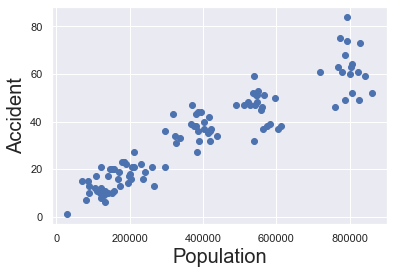

In [13]:
plt.scatter(b,a)
plt.xlabel('Population', fontsize = 20)
plt.ylabel('Accident', fontsize = 20)
plt.show()

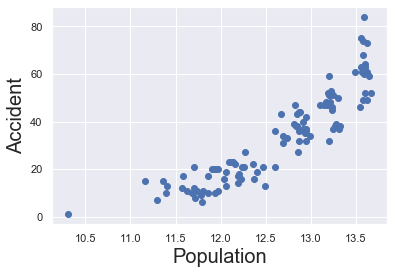

In [14]:
plt.scatter(log_b,a)
plt.xlabel('Population', fontsize = 20)
plt.ylabel('Accident', fontsize = 20)
plt.show()

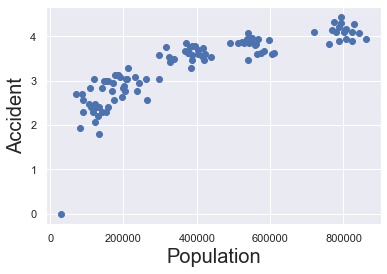

In [15]:
plt.scatter(b,log_a)
plt.xlabel('Population', fontsize = 20)
plt.ylabel('Accident', fontsize = 20)
plt.show()

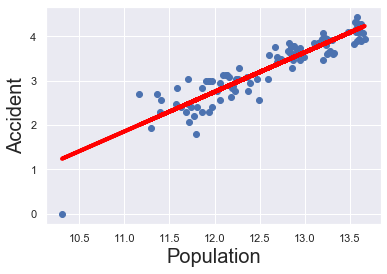

In [16]:
plt.scatter(log_b,log_a)
yh = -7.9563 + 0.8922*log_b
fig = plt.plot(log_b,yh, lw=4,c='red', label='Regression Line')
plt.xlabel('Population', fontsize = 20)
plt.ylabel('Accident', fontsize = 20)
plt.show()

In [17]:
xlog = sm.add_constant(log_b)
results = sm.OLS(log_a,xlog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Accidents   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     591.9
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           5.90e-45
Time:                        11:58:17   Log-Likelihood:                -12.665
No. Observations:                 107   AIC:                             29.33
Df Residuals:                     105   BIC:                             34.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9563      0.465    -17.121      0.000      -8.878      -7.035
Population     0.8922      0.037     24.329      0.000       0.819       0.965
==============================================================================
Omnibus:                       26.265   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.830
Skew:                          -0.894   Prob(JB):                     2.27e-14
Kurtosis:                       6.301   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ------------------------------------------------------------------------

# Dummy Variables

In [19]:
dummyData = pd.read_csv("1.03. Dummies.csv")

In [20]:
dummyData.head(3)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No


In [21]:
DummyData = dummyData.copy()

In [22]:
DummyData['Attendance'] = DummyData['Attendance'].map({'Yes':1,'No':0})

In [23]:
DummyData.head(3)

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0


In [24]:
DummyData.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


From the Mean result, we can see that for Attendance we have is 0.4642 which indicates there are more 0s than 1s. 
This implies 46%  of the students have attendent most of the classes.

## Regression

In [25]:
yDummy = DummyData['GPA']
xDummy = DummyData[['SAT', 'Attendance']]

In [29]:
xD = sm.add_constant(xDummy)
resultsD = sm.OLS(yDummy, xD).fit()
resultsD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           2.19e-15
Time:                        12:09:48   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### NOTES ON REGRESSION

The adj. R-Squared increased to 0.555 so we have a better model due to adding a good independent variable (Attendance)

The R-Squared Value is also increased

Our overall model is significant (F-statitic = 52.70)

The SAT score is significant (p-value = 0)
The Attendance is significant (p-value = 0)

The yhat model for absent student is (Attendance 0) => yhat0 = 0.6439+0.0014*SAT

The yhat model for present student is (Attendance 1) => yhat1 = 0.6439+0.0014*SAT+0.2226*1

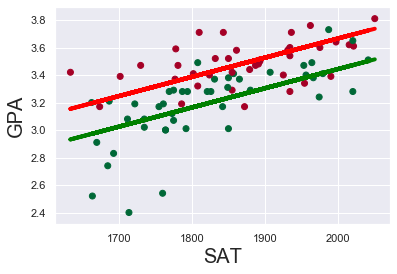

In [51]:
plt.scatter(DummyData['SAT'], yDummy, c=DummyData['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439+0.0014*DummyData['SAT']
yhat_yes = 0.6439+0.0014*DummyData['SAT']+0.22261
fig = plt.plot(DummyData['SAT'],yhat_no, lw=4,c='green', label='Regression Line')
fig = plt.plot(DummyData['SAT'],yhat_yes, lw=4,c='red', label='Regression Line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# How to make a PREDICTION based on the Regression we Create?

In [54]:
xD
# This is the constant variable we add to the stats model,
#The const column contains only 1s, as

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


#### Now lets create a dataframe which we will use for prediction and will organize it in the same way as above

In [55]:
data_pred = pd.DataFrame({'const':1,'SAT':[1700, 1670], 'Attendance': [0,1]})
data_pred = data_pred[['const','SAT','Attendance']]
data_pred

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [56]:
data_pred.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [59]:
predictions = resultsD.predict(data_pred)
predictions

0    3.023513
1    3.204163
dtype: float64

In [61]:
predictionDF = pd.DataFrame({'Predictions':predictions})
joinTable = data_pred.join(predictionDF)
joinTable.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


### We predict the expected graduation GPA, for 2 students with different SAT scores and Attendance 
Bob Will have a GPA Of 3.02

Alice will have a GPA Of 3.20